<a href="https://colab.research.google.com/github/DarshanaHeendeniya/ML_Learning/blob/main/Air_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Air Quality, Weather, and Respiratory Health**

In [12]:
# Importing required packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
# Importing data and storing in a DataFrame
df = pd.read_csv('/air_quality_health_dataset.csv')
df.tail()

,date,region,AQI,PM2.5,PM10,NO2,SO2,CO,O3,temperature,...,school_closures,public_transport_usage,mask_usage_rate,lockdown_status,industrial_activity,vehicle_count,construction_activity,respiratory_admissions,population_density,green_cover_percentage
2995,2020-03-16,West,101.549610,62.572040,82.032601,28.188065,15.451740,1.295485,26.473666,30.823665,...,0,6.268495,79.924698,0,63.894720,9727,17.517691,8,6376.519945,12.957398
2996,2020-03-17,Central,105.155051,77.289722,103.344355,39.271776,26.185755,0.765007,41.684453,28.343987,...,0,21.483037,76.189034,0,115.253298,7571,10.698859,7,2895.955761,46.956454
2997,2020-03-18,East,75.164788,41.738943,111.768944,48.380141,26.561040,1.235577,39.295269,26.050318,...,0,93.894493,60.866306,0,57.151724,1497,42.777210,10,8137.193349,18.919346
2998,2020-03-19,Central,106.683528,67.019256,66.300256,38.993041,15.579454,0.655209,31.667658,26.028273,...,0,73.990617,91.471722,0,66.552816,3412,1.218238,11,8997.326165,25.754999
2999,2020-03-20,South,96.894819,42.445789,96.023635,30.536862,19.231074,1.309425,12.106839,27.691147,...,0,83.435240,62.532516,1,97.073254,4788,38.134396,15,710.756315,40.450717


In [14]:
# Exploring the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    3000 non-null   object 
 1   region                  3000 non-null   object 
 2   AQI                     3000 non-null   float64
 3   PM2.5                   3000 non-null   float64
 4   PM10                    3000 non-null   float64
 5   NO2                     3000 non-null   float64
 6   SO2                     3000 non-null   float64
 7   CO                      3000 non-null   float64
 8   O3                      3000 non-null   float64
 9   temperature             3000 non-null   float64
 10  humidity                3000 non-null   float64
 11  wind_speed              3000 non-null   float64
 12  precipitation           3000 non-null   float64
 13  hospital_visits         3000 non-null   int64  
 14  emergency_visits        3000 non-null   

In [15]:
# Convert the data type of date column to datetime
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    3000 non-null   datetime64[ns]
 1   region                  3000 non-null   object        
 2   AQI                     3000 non-null   float64       
 3   PM2.5                   3000 non-null   float64       
 4   PM10                    3000 non-null   float64       
 5   NO2                     3000 non-null   float64       
 6   SO2                     3000 non-null   float64       
 7   CO                      3000 non-null   float64       
 8   O3                      3000 non-null   float64       
 9   temperature             3000 non-null   float64       
 10  humidity                3000 non-null   float64       
 11  wind_speed              3000 non-null   float64       
 12  precipitation           3000 non-null   float64 

In [16]:
# Setting date as index
df.set_index('date', inplace=True)
df.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-14',
               '2020-03-15', '2020-03-16', '2020-03-17', '2020-03-18',
               '2020-03-19', '2020-03-20'],
              dtype='datetime64[ns]', name='date', length=3000, freq=None)

In [31]:
df_north = df[df['region'] == 'North']
df_north.head()

,region,AQI,PM2.5,PM10,NO2,SO2,CO,O3,temperature,humidity,...,vehicle_count,construction_activity,respiratory_admissions,population_density,green_cover_percentage,year,month,day,day_of_week,hour
date,,,,,,,,,,,,,,,,,,,,,
2020-01-09,North,90.610512,76.240366,102.801357,43.051508,18.159709,0.621089,26.556682,23.437526,40.259227,...,4705,83.640354,8,1882.424687,63.199856,2020,1,9,3,0
2020-01-14,North,61.734395,39.043227,101.883591,41.488088,24.233856,1.344256,25.721994,27.529672,29.322632,...,1954,65.015452,13,6117.650425,61.556382,2020,1,14,1,0
2020-01-19,North,81.839518,53.232617,77.053195,38.055085,23.190920,0.703025,29.882018,33.358297,82.119957,...,3355,85.111533,9,862.097657,68.290435,2020,1,19,6,0
2020-01-26,North,102.218452,54.172188,82.331570,46.946691,22.456370,0.625509,32.242330,24.956052,75.689512,...,3173,23.227424,9,4461.195347,13.723770,2020,1,26,6,0
2020-02-09,North,103.937225,56.900831,96.346124,39.925192,14.647659,1.004735,26.495371,25.420109,73.422530,...,8091,88.884386,4,2601.936501,13.016513,2020,2,9,6,0


In [32]:
df_north.index

DatetimeIndex(['2020-01-09', '2020-01-14', '2020-01-19', '2020-01-26',
               '2020-02-09', '2020-02-18', '2020-02-19', '2020-02-21',
               '2020-02-28', '2020-03-03',
               ...
               '2020-02-05', '2020-02-10', '2020-02-14', '2020-02-18',
               '2020-02-25', '2020-02-27', '2020-03-01', '2020-03-05',
               '2020-03-10', '2020-03-12'],
              dtype='datetime64[ns]', name='date', length=586, freq=None)

In [38]:
df_north.sort_index(ascending = True, inplace = True)
df_north.head(15)

,region,AQI,PM2.5,PM10,NO2,SO2,CO,O3,temperature,humidity,...,vehicle_count,construction_activity,respiratory_admissions,population_density,green_cover_percentage,year,month,day,day_of_week,hour
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,North,97.230880,77.828952,67.886400,27.333680,18.045559,0.927937,27.286362,32.296648,51.491412,...,9155,86.939209,17,7504.238032,19.907385,2020,1,1,2,0
2020-01-02,North,109.243453,59.380610,71.799412,37.198890,20.935345,1.085104,29.860927,20.253602,35.065952,...,8971,12.523466,8,3589.695413,35.347228,2020,1,2,3,0
2020-01-03,North,140.486192,68.340331,78.583263,37.194283,18.387389,1.128037,28.064631,28.730870,33.820070,...,6456,83.622468,10,647.427286,8.242907,2020,1,3,4,0
2020-01-04,North,65.948328,62.175956,66.390119,27.548494,30.201733,1.009085,31.987699,27.417474,74.347540,...,1359,93.698836,7,7980.884374,60.782821,2020,1,4,5,0
2020-01-05,North,103.794123,32.301404,82.153989,36.538957,14.349417,0.698291,43.773541,21.116440,87.749539,...,2511,29.194803,6,6979.553433,41.780777,2020,1,5,6,0
2020-01-05,North,88.389531,51.299755,122.225927,37.321013,21.303281,0.757072,22.974919,35.114331,53.851488,...,1067,2.789644,12,2397.222720,11.250713,2020,1,5,6,0
2020-01-06,North,111.771568,42.653763,62.788692,32.912218,26.587704,0.758379,44.564642,26.342680,53.737701,...,7097,92.213708,16,5292.357556,31.135275,2020,1,6,0,0
2020-01-09,North,76.082339,61.611666,71.572864,52.237936,23.198688,0.919078,39.627680,22.449809,53.700752,...,9534,71.348149,11,4823.645888,24.072116,2020,1,9,3,0
2020-01-09,North,90.610512,76.240366,102.801357,43.051508,18.159709,0.621089,26.556682,23.437526,40.259227,...,4705,83.640354,8,1882.424687,63.199856,2020,1,9,3,0


In [40]:
df_north.drop('region', axis = 1, inplace = True)
df_north.head()

/tmp/ipython-input-2714339395.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_north.drop('region', axis = 1, inplace = True)


,AQI,PM2.5,PM10,NO2,SO2,CO,O3,temperature,humidity,wind_speed,...,vehicle_count,construction_activity,respiratory_admissions,population_density,green_cover_percentage,year,month,day,day_of_week,hour
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,97.230880,77.828952,67.886400,27.333680,18.045559,0.927937,27.286362,32.296648,51.491412,5.402175,...,9155,86.939209,17,7504.238032,19.907385,2020,1,1,2,0
2020-01-02,109.243453,59.380610,71.799412,37.198890,20.935345,1.085104,29.860927,20.253602,35.065952,5.862775,...,8971,12.523466,8,3589.695413,35.347228,2020,1,2,3,0
2020-01-03,140.486192,68.340331,78.583263,37.194283,18.387389,1.128037,28.064631,28.730870,33.820070,4.461378,...,6456,83.622468,10,647.427286,8.242907,2020,1,3,4,0
2020-01-04,65.948328,62.175956,66.390119,27.548494,30.201733,1.009085,31.987699,27.417474,74.347540,5.140106,...,1359,93.698836,7,7980.884374,60.782821,2020,1,4,5,0
2020-01-05,103.794123,32.301404,82.153989,36.538957,14.349417,0.698291,43.773541,21.116440,87.749539,5.423106,...,2511,29.194803,6,6979.553433,41.780777,2020,1,5,6,0


In [62]:
# Resampling to weekly frequency and calculate the mean
df_north_monthly = df_north.resample('W').mean()
df_north_monthly.head()

,AQI,PM2.5,PM10,NO2,SO2,CO,O3,temperature,humidity,wind_speed,...,vehicle_count,construction_activity,respiratory_admissions,population_density,green_cover_percentage,year,month,day,day_of_week,hour
date,,,,,,,,,,,,,,,,,,,,,
2020-01-05,100.848751,58.554501,81.506518,33.855886,20.537121,0.934254,30.658013,27.488227,56.054334,5.139107,...,4919.833333,51.461404,10.000000,4849.836876,29.551972,2020.0,1.000000,3.333333,4.333333,0.0
2020-01-12,85.411734,57.446396,70.737711,40.015032,20.050022,0.720045,32.601319,25.300685,57.308302,7.179209,...,5820.000000,81.806834,12.000000,3652.080700,40.796136,2020.0,1.000000,8.750000,2.750000,0.0
2020-01-19,90.107487,52.226844,77.709996,38.925662,20.377881,0.948823,26.317736,27.019037,72.564866,7.694750,...,3289.800000,55.475342,12.000000,4246.635609,57.843219,2020.0,1.000000,14.800000,1.800000,0.0
2020-01-26,97.946174,64.893923,77.472320,48.909348,20.740500,1.089309,26.130202,22.487058,61.978724,8.242206,...,3566.800000,36.483044,10.000000,5834.829943,26.646247,2020.0,1.000000,23.200000,3.200000,0.0
2020-02-02,104.235599,55.835505,80.680158,37.704800,24.091254,1.066379,32.914318,23.641274,57.574076,7.730600,...,5844.000000,24.921273,10.428571,4651.182808,27.960515,2020.0,1.428571,17.714286,4.000000,0.0


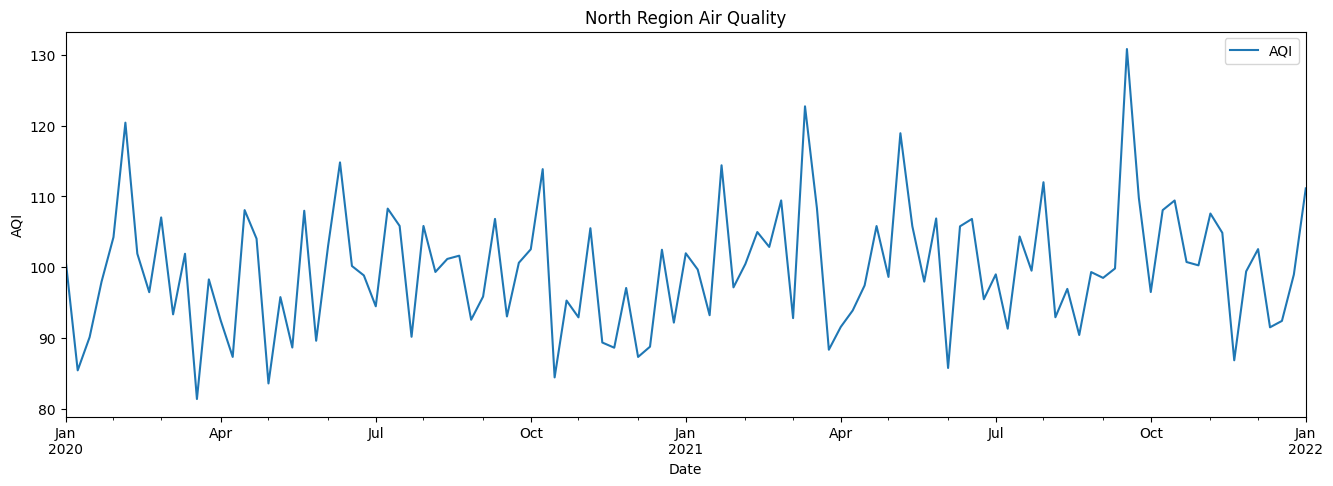

In [61]:
# Plotting North Region AQI
df_north_monthly['AQI'].plot(figsize = (16,5), title = 'North Region Air Quality', xlabel = 'Date', ylabel = 'AQI', legend = True)
plt.show()

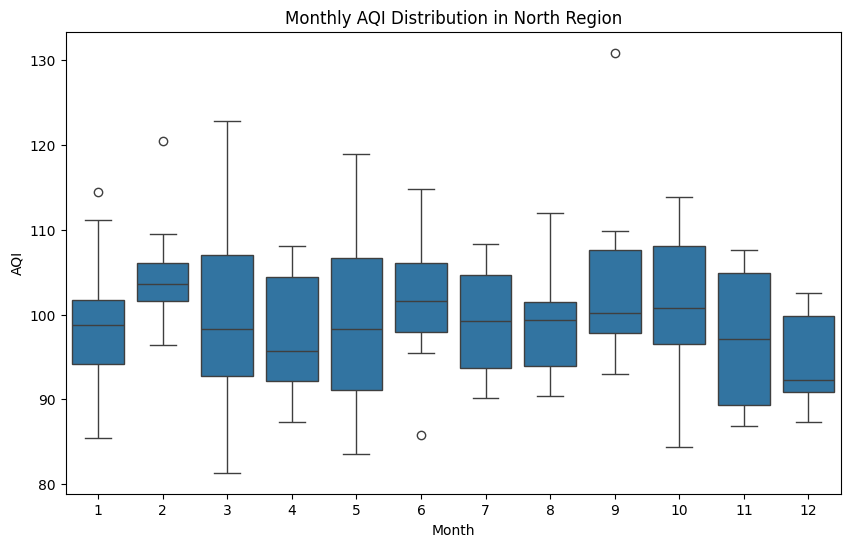

In [58]:
# Display monthly AQI as a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_north_monthly.index.month, y=df_north_monthly['AQI'])
plt.title('Monthly AQI Distribution in North Region')
plt.xlabel('Month')
plt.ylabel('AQI')
plt.show()

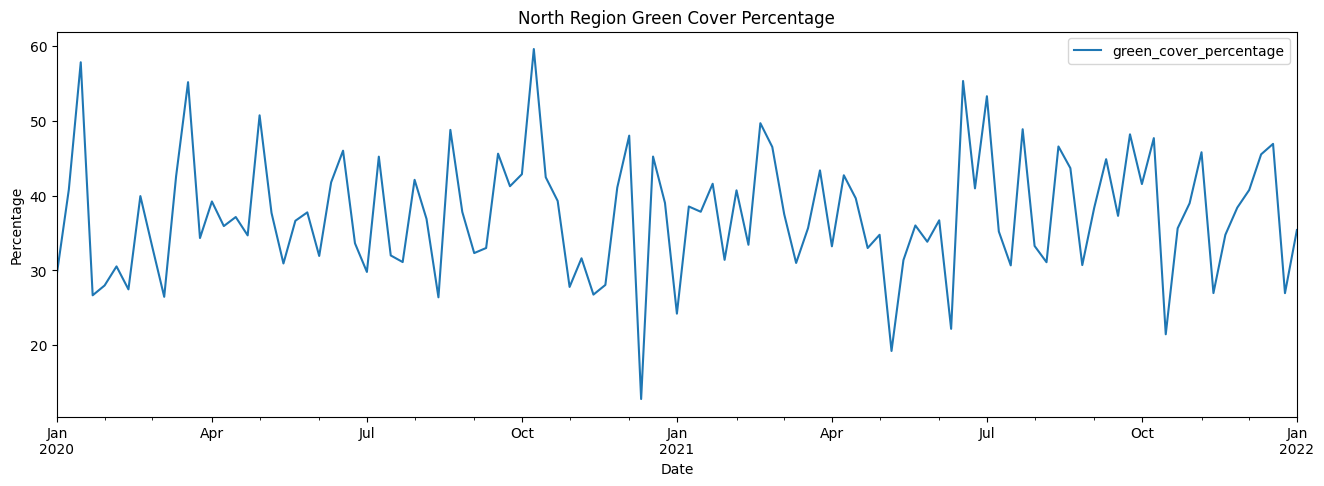

In [50]:
# PLotting green cover percetage of north region
df_north_monthly['green_cover_percentage'].plot(figsize = (16,5), title = 'North Region Green Cover Percentage', xlabel = 'Date', ylabel = 'Percentage', legend = True)
plt.show()

In [48]:
# Calculate the percentage of respiratory admission cases out of population density
df_north_monthly['percent_respiratory_admissions'] = (df_north_monthly['respiratory_admissions'] / df_north_monthly['population_density']) * 100
df_north_monthly.head()

,AQI,PM2.5,PM10,NO2,SO2,CO,O3,temperature,humidity,wind_speed,...,construction_activity,respiratory_admissions,population_density,green_cover_percentage,year,month,day,day_of_week,hour,percent_respiratory_admissions
date,,,,,,,,,,,,,,,,,,,,,
2020-01-05,100.848751,58.554501,81.506518,33.855886,20.537121,0.934254,30.658013,27.488227,56.054334,5.139107,...,51.461404,10.000000,4849.836876,29.551972,2020.0,1.000000,3.333333,4.333333,0.0,0.206193
2020-01-12,85.411734,57.446396,70.737711,40.015032,20.050022,0.720045,32.601319,25.300685,57.308302,7.179209,...,81.806834,12.000000,3652.080700,40.796136,2020.0,1.000000,8.750000,2.750000,0.0,0.328580
2020-01-19,90.107487,52.226844,77.709996,38.925662,20.377881,0.948823,26.317736,27.019037,72.564866,7.694750,...,55.475342,12.000000,4246.635609,57.843219,2020.0,1.000000,14.800000,1.800000,0.0,0.282577
2020-01-26,97.946174,64.893923,77.472320,48.909348,20.740500,1.089309,26.130202,22.487058,61.978724,8.242206,...,36.483044,10.000000,5834.829943,26.646247,2020.0,1.000000,23.200000,3.200000,0.0,0.171385
2020-02-02,104.235599,55.835505,80.680158,37.704800,24.091254,1.066379,32.914318,23.641274,57.574076,7.730600,...,24.921273,10.428571,4651.182808,27.960515,2020.0,1.428571,17.714286,4.000000,0.0,0.224213


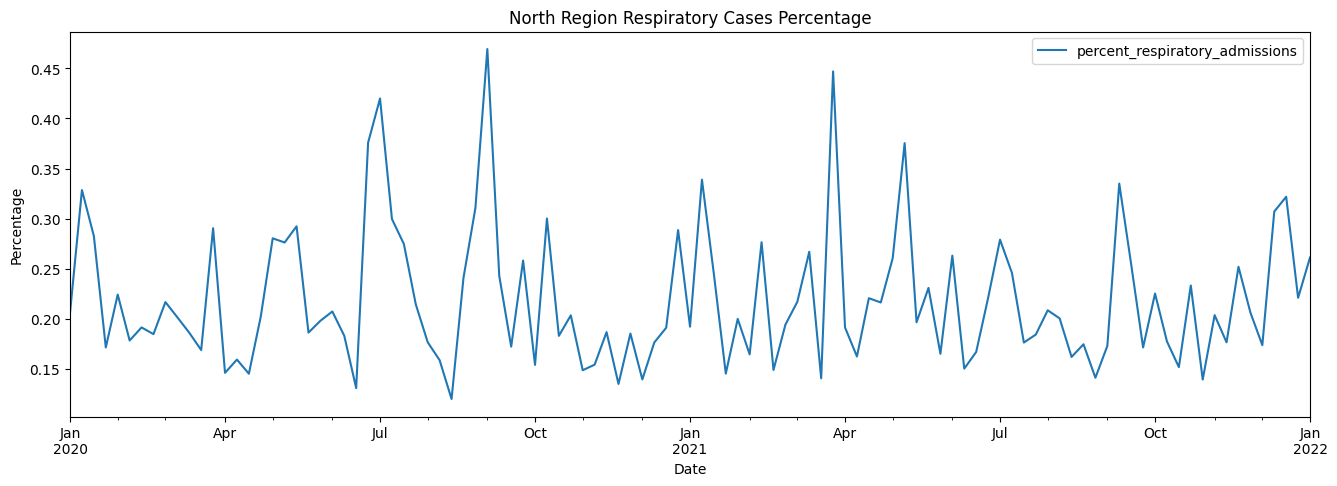

In [60]:
# plotting the percent respiratory admission cases
df_north_monthly['percent_respiratory_admissions'].plot(figsize = (16,5), title = 'North Region Respiratory Cases Percentage', xlabel = 'Date', ylabel = 'Percentage', legend = True)
plt.show()

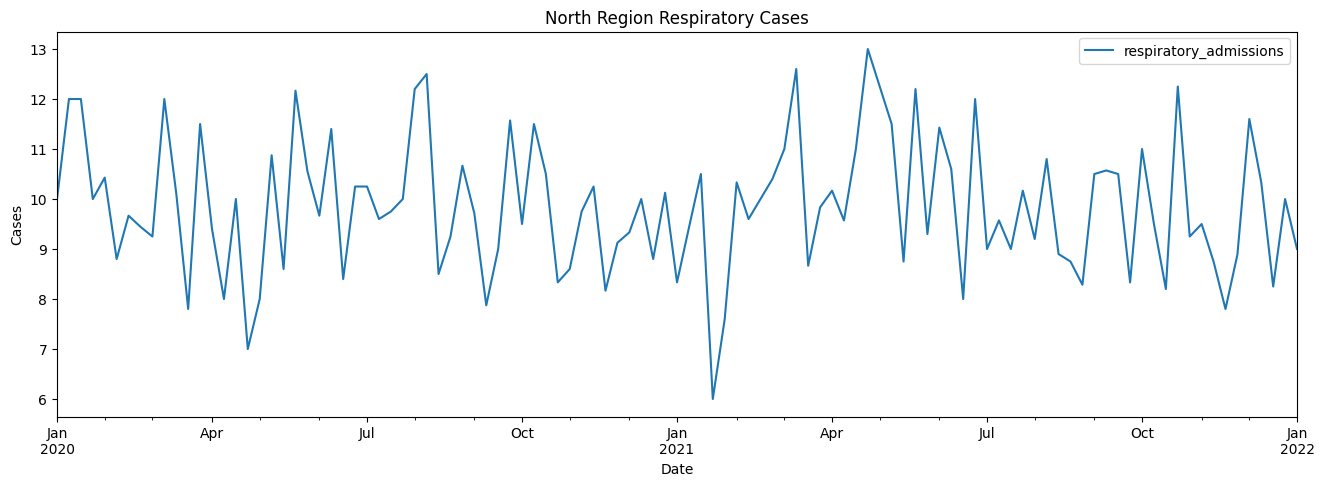

In [47]:
# Plotting respiratory admission cases in north region
df_north_monthly['respiratory_admissions'].plot(figsize = (16,5), title = 'North Region Respiratory Cases', xlabel = 'Date', ylabel = 'Cases', legend = True)
plt.show()

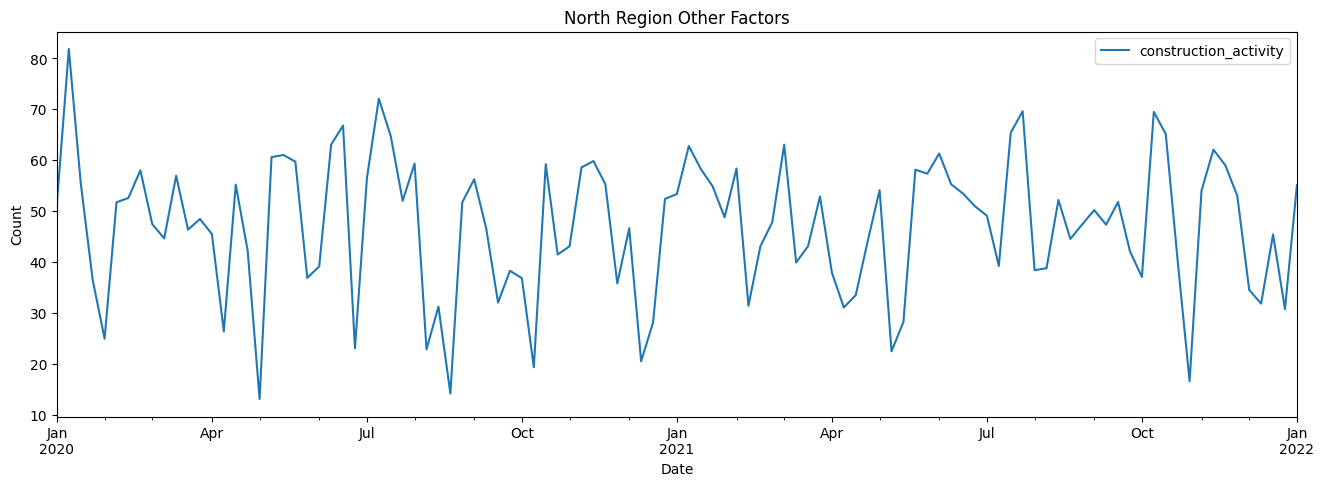

In [52]:
# plotting other factors
df_north_monthly[['construction_activity']].plot(figsize = (16,5), title = 'North Region Other Factors', xlabel = 'Date', ylabel = 'Count', legend = True)
plt.show()

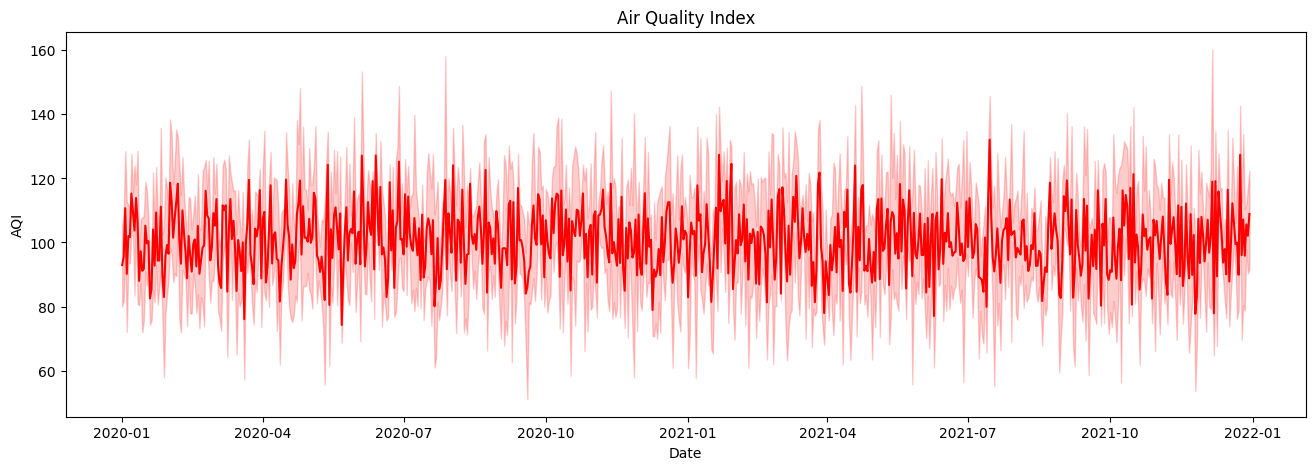

In [17]:
# Plotting AQI
plt.figure(figsize = (16,5))
sns.lineplot(data = df['AQI'], color = 'red')
plt.title('Air Quality Index')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.show()

**Plotting region wise AQI**

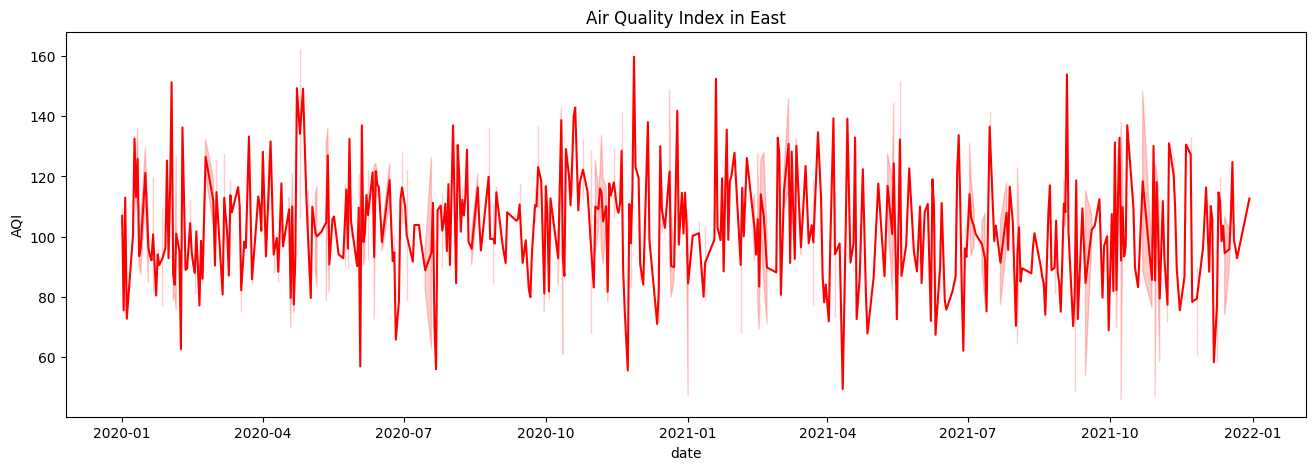

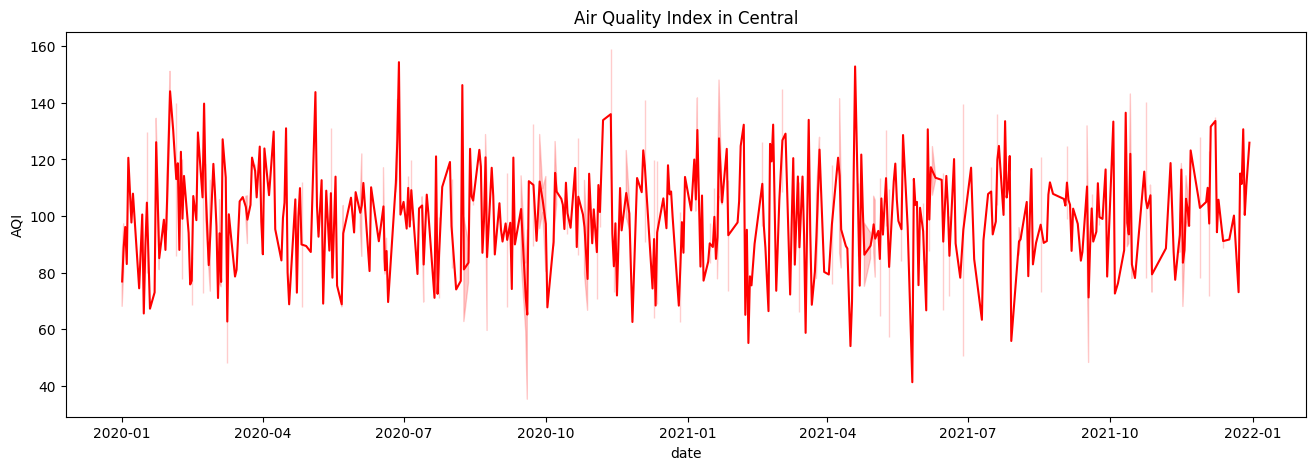

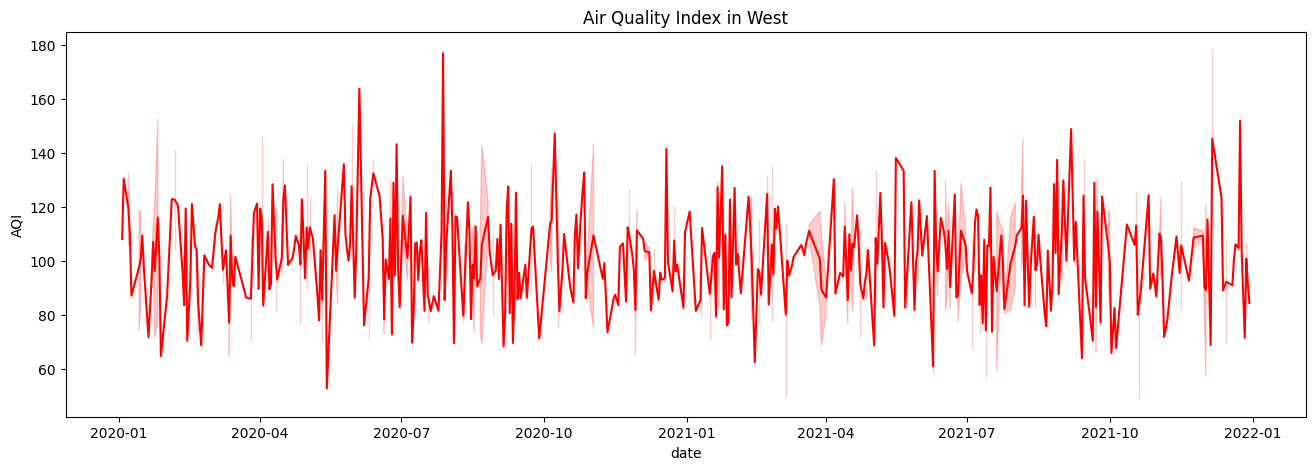

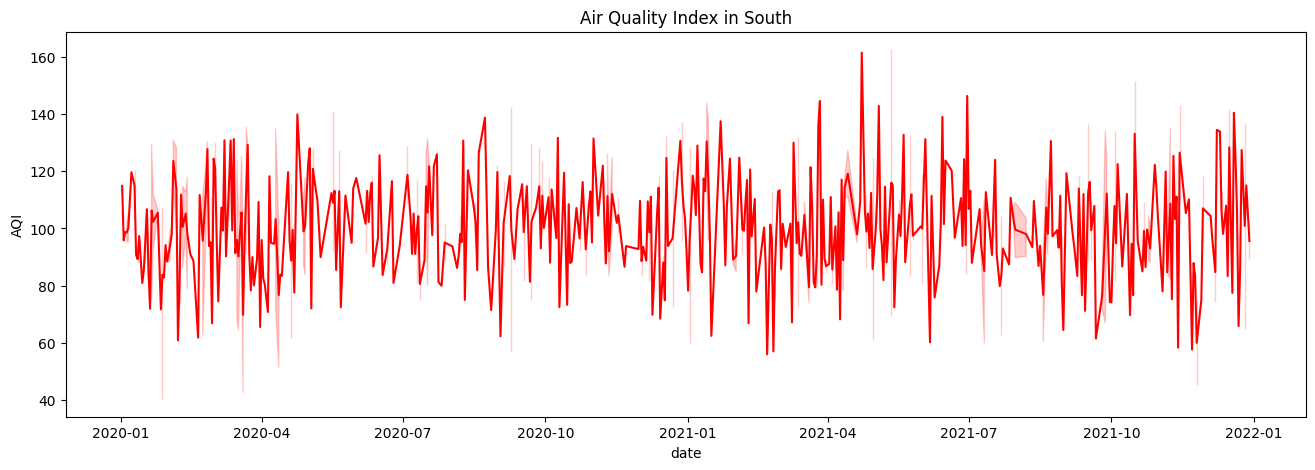

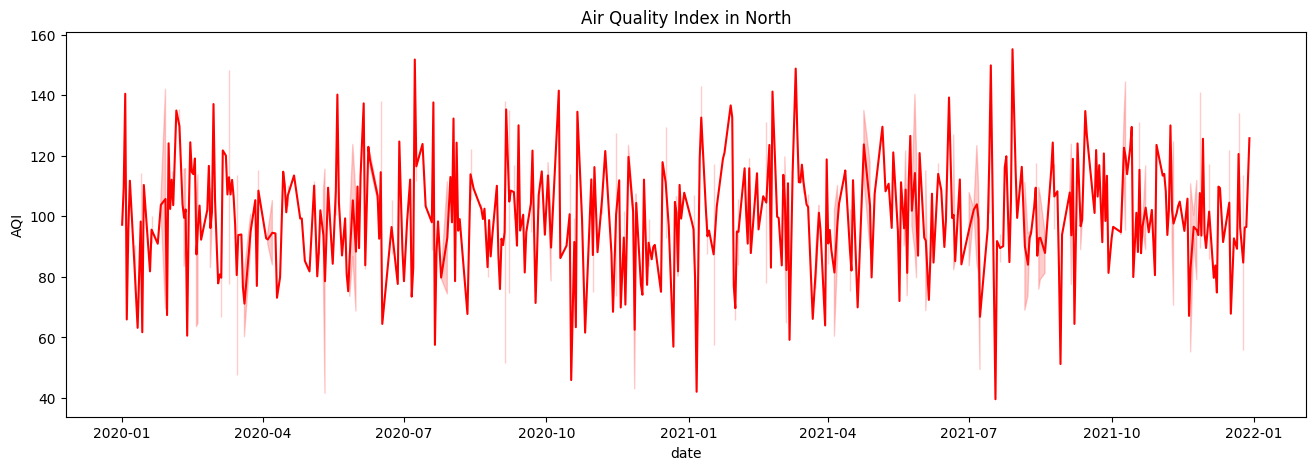

In [18]:
for region in df['region'].unique():
  plt.figure(figsize = (16,5))
  sns.lineplot(data = df[df['region'] == region]['AQI'], color = 'red')
  plt.title(f'Air Quality Index in {region}')

# **Create features**

In [19]:
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['day_of_week'] = df.index.dayofweek
df['hour'] = df.index.hour
df.head()

,region,AQI,PM2.5,PM10,NO2,SO2,CO,O3,temperature,humidity,...,vehicle_count,construction_activity,respiratory_admissions,population_density,green_cover_percentage,year,month,day,day_of_week,hour
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,East,109.934283,31.382887,57.718373,47.654022,25.874070,0.956973,32.574682,37.555663,20.542799,...,9757,63.001573,11,1957.637287,42.348419,2020,1,1,2,0
2020-01-02,Central,97.234714,47.094225,67.381383,50.734127,10.605095,0.990203,23.749138,24.900342,27.308785,...,9157,6.417798,13,2962.769470,27.712735,2020,1,2,3,0
2020-01-03,East,112.953771,53.795917,61.158796,44.986899,18.361025,1.019288,35.530851,23.437165,80.055977,...,2058,66.001849,3,6912.007043,41.031516,2020,1,3,4,0
2020-01-04,West,130.460597,88.315315,69.040084,20.575023,19.791700,1.284058,25.277106,22.388200,25.929988,...,8726,79.580923,6,9227.543628,40.543537,2020,1,4,5,0
2020-01-05,South,95.316933,68.348297,75.716994,38.445776,20.079543,0.775835,35.996440,26.881835,34.946343,...,9720,6.301105,8,1277.810175,5.648920,2020,1,5,6,0


In [20]:
df1 = df.drop('region', axis = 1)
df1.head()

,AQI,PM2.5,PM10,NO2,SO2,CO,O3,temperature,humidity,wind_speed,...,vehicle_count,construction_activity,respiratory_admissions,population_density,green_cover_percentage,year,month,day,day_of_week,hour
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,109.934283,31.382887,57.718373,47.654022,25.874070,0.956973,32.574682,37.555663,20.542799,5.204995,...,9757,63.001573,11,1957.637287,42.348419,2020,1,1,2,0
2020-01-02,97.234714,47.094225,67.381383,50.734127,10.605095,0.990203,23.749138,24.900342,27.308785,6.235446,...,9157,6.417798,13,2962.769470,27.712735,2020,1,2,3,0
2020-01-03,112.953771,53.795917,61.158796,44.986899,18.361025,1.019288,35.530851,23.437165,80.055977,5.673999,...,2058,66.001849,3,6912.007043,41.031516,2020,1,3,4,0
2020-01-04,130.460597,88.315315,69.040084,20.575023,19.791700,1.284058,25.277106,22.388200,25.929988,8.496463,...,8726,79.580923,6,9227.543628,40.543537,2020,1,4,5,0
2020-01-05,95.316933,68.348297,75.716994,38.445776,20.079543,0.775835,35.996440,26.881835,34.946343,1.184104,...,9720,6.301105,8,1277.810175,5.648920,2020,1,5,6,0


In [21]:
df1.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-03-11', '2020-03-12', '2020-03-13', '2020-03-14',
               '2020-03-15', '2020-03-16', '2020-03-17', '2020-03-18',
               '2020-03-19', '2020-03-20'],
              dtype='datetime64[ns]', name='date', length=3000, freq=None)

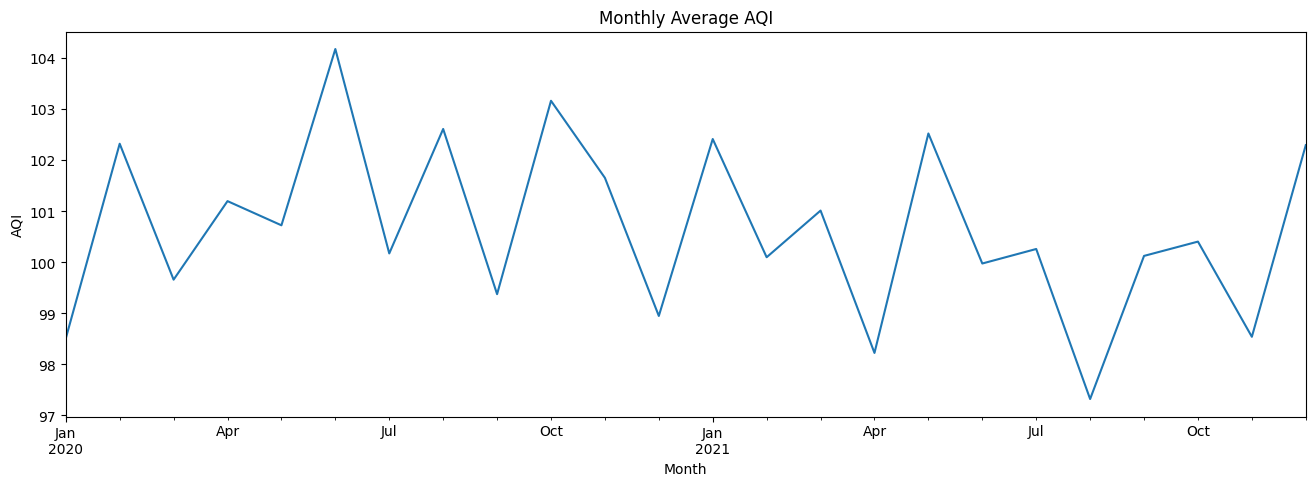

In [23]:
# creating a bar chart to display average AQI each month of each year
df1.resample('ME').mean()['AQI'].plot(figsize = (16,5))
plt.title('Monthly Average AQI')
plt.xlabel('Month')
plt.ylabel('AQI')
plt.show()


In [24]:
# Calculate the 7 day rolling average of AQI
df1['7day_rolling_AQI'] = df1['AQI'].rolling(window = 7).mean()

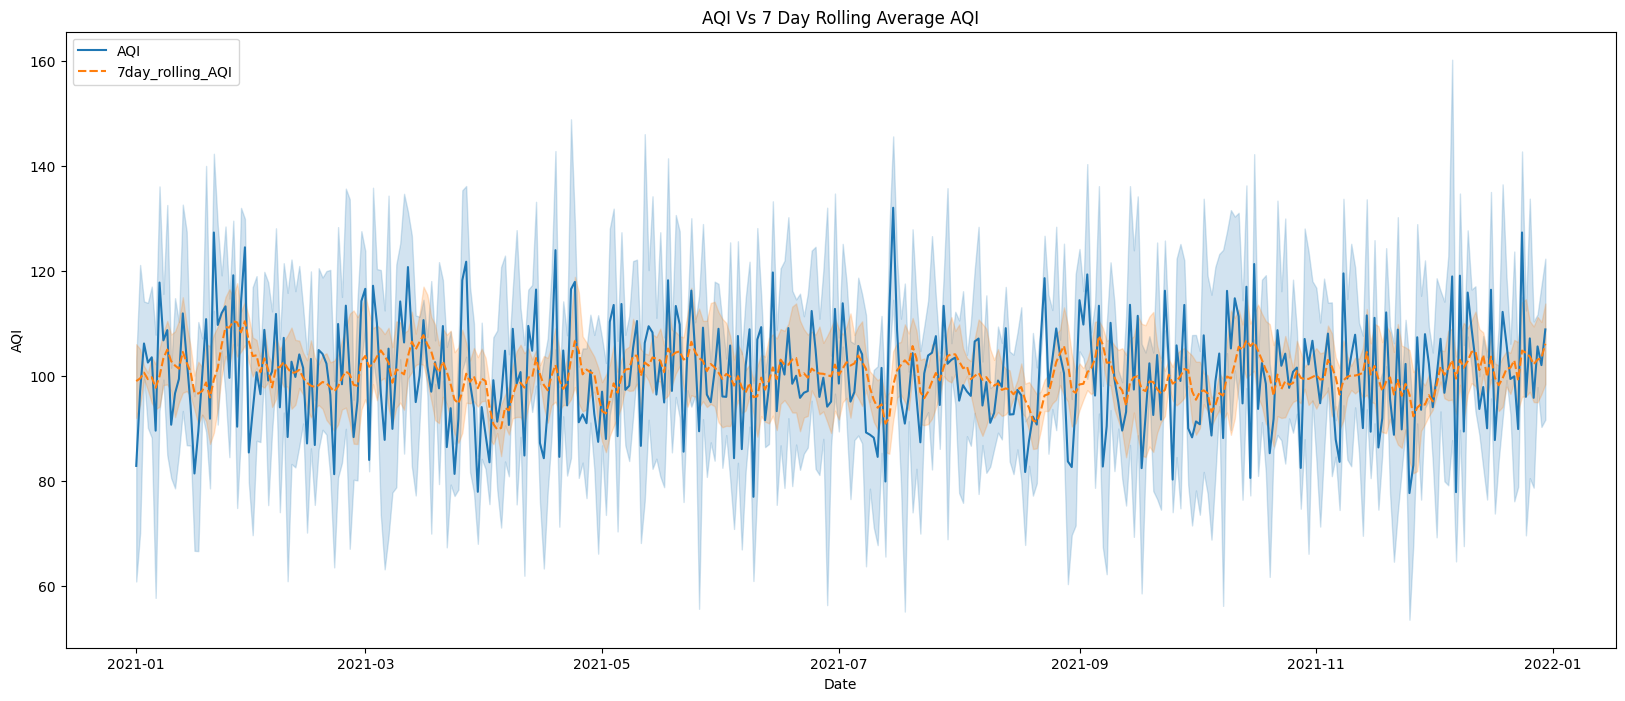

In [25]:

plt.figure(figsize = (20,8))
sns.lineplot(df1[['AQI', '7day_rolling_AQI']].loc['2021'], color = 'red')
plt.title('AQI Vs 7 Day Rolling Average AQI')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.show()

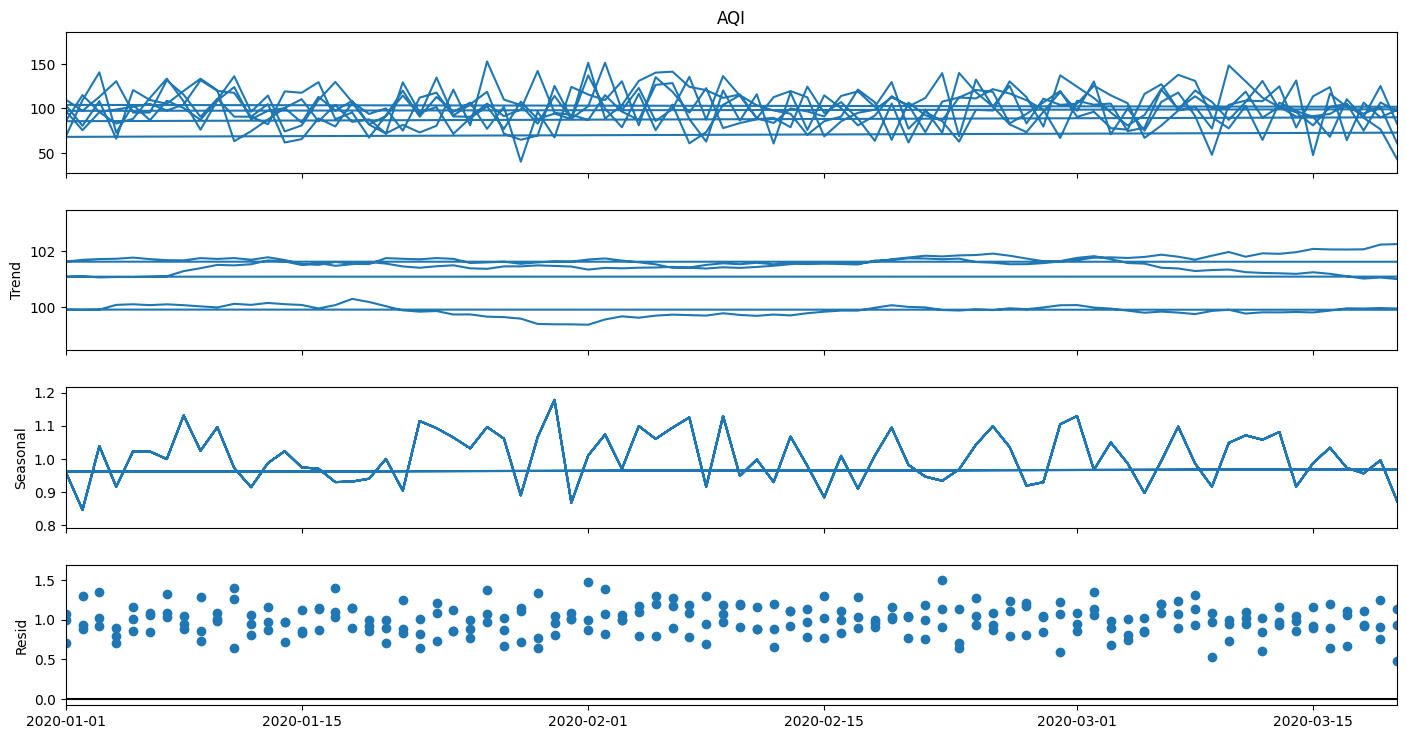

In [28]:
# Check the seasonality, trend and residual
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df1['AQI'], model = 'mul', period = 365)
fig = decomposition.plot()
fig.set_size_inches(16,8)
plt.show()

In [30]:
# sort index
df2 = df1.sort_index(ascending = True)
df2.head(15)

,AQI,PM2.5,PM10,NO2,SO2,CO,O3,temperature,humidity,wind_speed,...,construction_activity,respiratory_admissions,population_density,green_cover_percentage,year,month,day,day_of_week,hour,7day_rolling_AQI
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,109.934283,31.382887,57.718373,47.654022,25.874070,0.956973,32.574682,37.555663,20.542799,5.204995,...,63.001573,11,1957.637287,42.348419,2020,1,1,2,0,NaN
2020-01-01,97.230880,77.828952,67.886400,27.333680,18.045559,0.927937,27.286362,32.296648,51.491412,5.402175,...,86.939209,17,7504.238032,19.907385,2020,1,1,2,0,105.039214
2020-01-01,68.037513,50.468852,92.081033,38.395500,27.101355,1.138981,26.891446,31.215518,87.268317,2.379946,...,55.676101,5,317.291536,40.791109,2020,1,1,2,0,89.120419
2020-01-01,85.623352,78.784255,113.666292,47.145498,19.306018,0.440248,36.166265,31.053789,22.821960,1.940109,...,63.393111,12,1089.105373,31.714070,2020,1,1,2,0,110.578041
2020-01-01,103.916905,72.870213,113.629849,27.225634,11.211063,0.146817,39.756263,26.274096,34.945222,1.455540,...,17.891791,10,443.323021,46.252979,2020,1,1,2,0,97.801939
2020-01-02,80.432544,47.577056,62.322622,51.565817,22.852924,0.581131,22.764839,33.580380,89.819678,14.211450,...,6.621110,11,2638.754447,20.517176,2020,1,2,3,0,94.518401
2020-01-02,75.514035,87.740432,79.359153,30.103490,21.016381,1.279304,32.335727,21.738684,42.838284,5.278425,...,49.168875,10,6064.822628,11.452565,2020,1,2,3,0,99.925478
2020-01-02,109.243453,59.380610,71.799412,37.198890,20.935345,1.085104,29.860927,20.253602,35.065952,5.862775,...,12.523466,8,3589.695413,35.347228,2020,1,2,3,0,96.760518
2020-01-02,97.234714,47.094225,67.381383,50.734127,10.605095,0.990203,23.749138,24.900342,27.308785,6.235446,...,6.417798,13,2962.769470,27.712735,2020,1,2,3,0,NaN
